In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

In [13]:
from util import RESOURCE_DIR
type_characterization = ['database.xlsx', 'implementation.xlsx']
CHARACTERIZATION_FILE_PATH = RESOURCE_DIR + os.sep + type_characterization[1]
df = pd.read_excel(CHARACTERIZATION_FILE_PATH, engine = 'openpyxl')
len(df)
df.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink
0,Activiti,automation,1,0,1,1,0,1,0
1,airbyte,infrastructure management,1,1,0,0,0,0,0
2,airsonic,media,1,0,0,0,0,1,1
3,spring-cloud-alibaba,infrastructure management,1,0,1,0,0,1,0
4,nacos,infrastructure management,1,0,0,0,0,1,0


In [14]:
df.iloc[: , 2:].sum().sort_values(ascending=False)

mybatis        248
Hibernate      205
JPA             68
Spring          45
EclipseLink     14
jOOQ             7
JDBC             0
dtype: int64

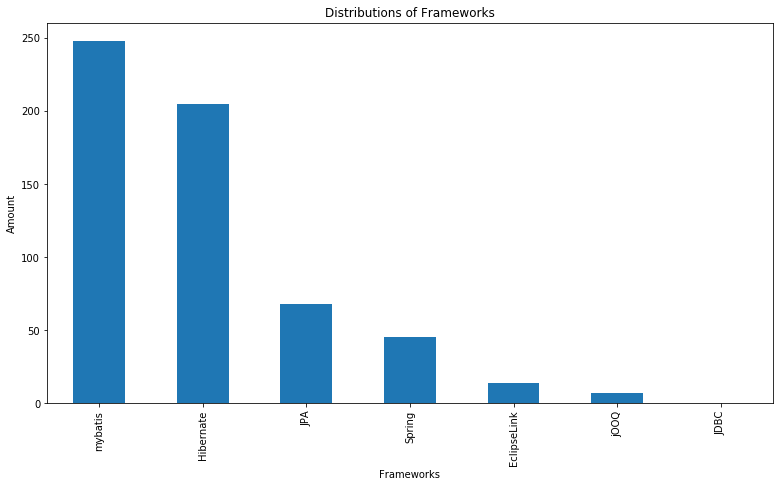

In [15]:
plt.figure(figsize=(13,7))
df.iloc[: , 2:].sum().sort_values(ascending=False).plot(kind='bar', title="Distributions of Frameworks")
plt.xlabel("Frameworks")
plt.ylabel("Amount")
plt.show() 

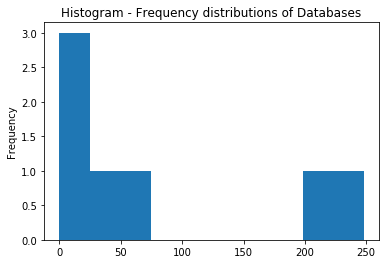

In [16]:
df.iloc[: , 2:].sum().plot(kind='hist', title="Histogram - Frequency distributions of Databases")

In [17]:
df.Domains.value_counts()

software development         75
media                        44
infrastructure management    40
network                      18
game                         18
security                     18
monitoring                   18
communication                16
program analysis             15
hpc                          15
machine learning             12
automation                    9
file management               7
application container         7
collaboration                 3
operating system              3
cryptocurrency                2
scm                           2
gestão pessoal                2
erp                           2
cms                           1
e-commerce                    1
Name: Domains, dtype: int64

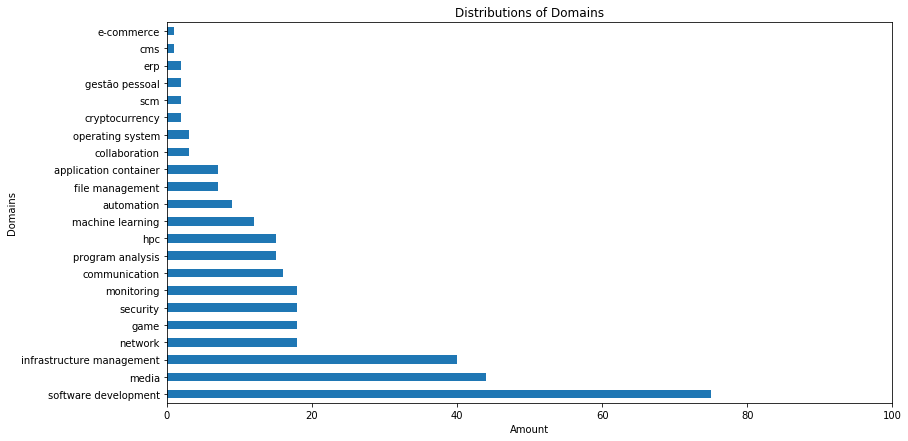

In [19]:
plt.figure(figsize=(13,7))
df.Domains.value_counts().plot(kind='barh', title = 'Distributions of Domains')
plt.xlim(0,100)
plt.xlabel("Amount")
plt.ylabel("Domains")
plt.show() 

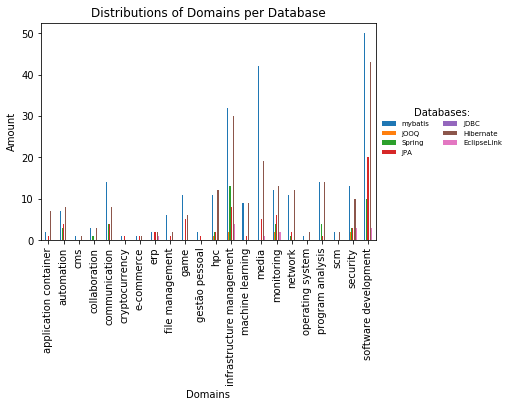

In [20]:
df.groupby(df.Domains).sum().plot(kind='bar')
plt.legend(title = "Databases:", frameon=False, ncol=2, prop={'size': 7}, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Distributions of Domains per Database")
plt.ylabel("Amount")
plt.show() 

In [21]:
df.loc[:,'SumPerProject'] = df.sum(axis=1)
df.head()

,Projects,Domains,mybatis,jOOQ,Spring,JPA,JDBC,Hibernate,EclipseLink,SumPerProject
0,Activiti,automation,1,0,1,1,0,1,0,4
1,airbyte,infrastructure management,1,1,0,0,0,0,0,2
2,airsonic,media,1,0,0,0,0,1,1,3
3,spring-cloud-alibaba,infrastructure management,1,0,1,0,0,1,0,3
4,nacos,infrastructure management,1,0,0,0,0,1,0,2


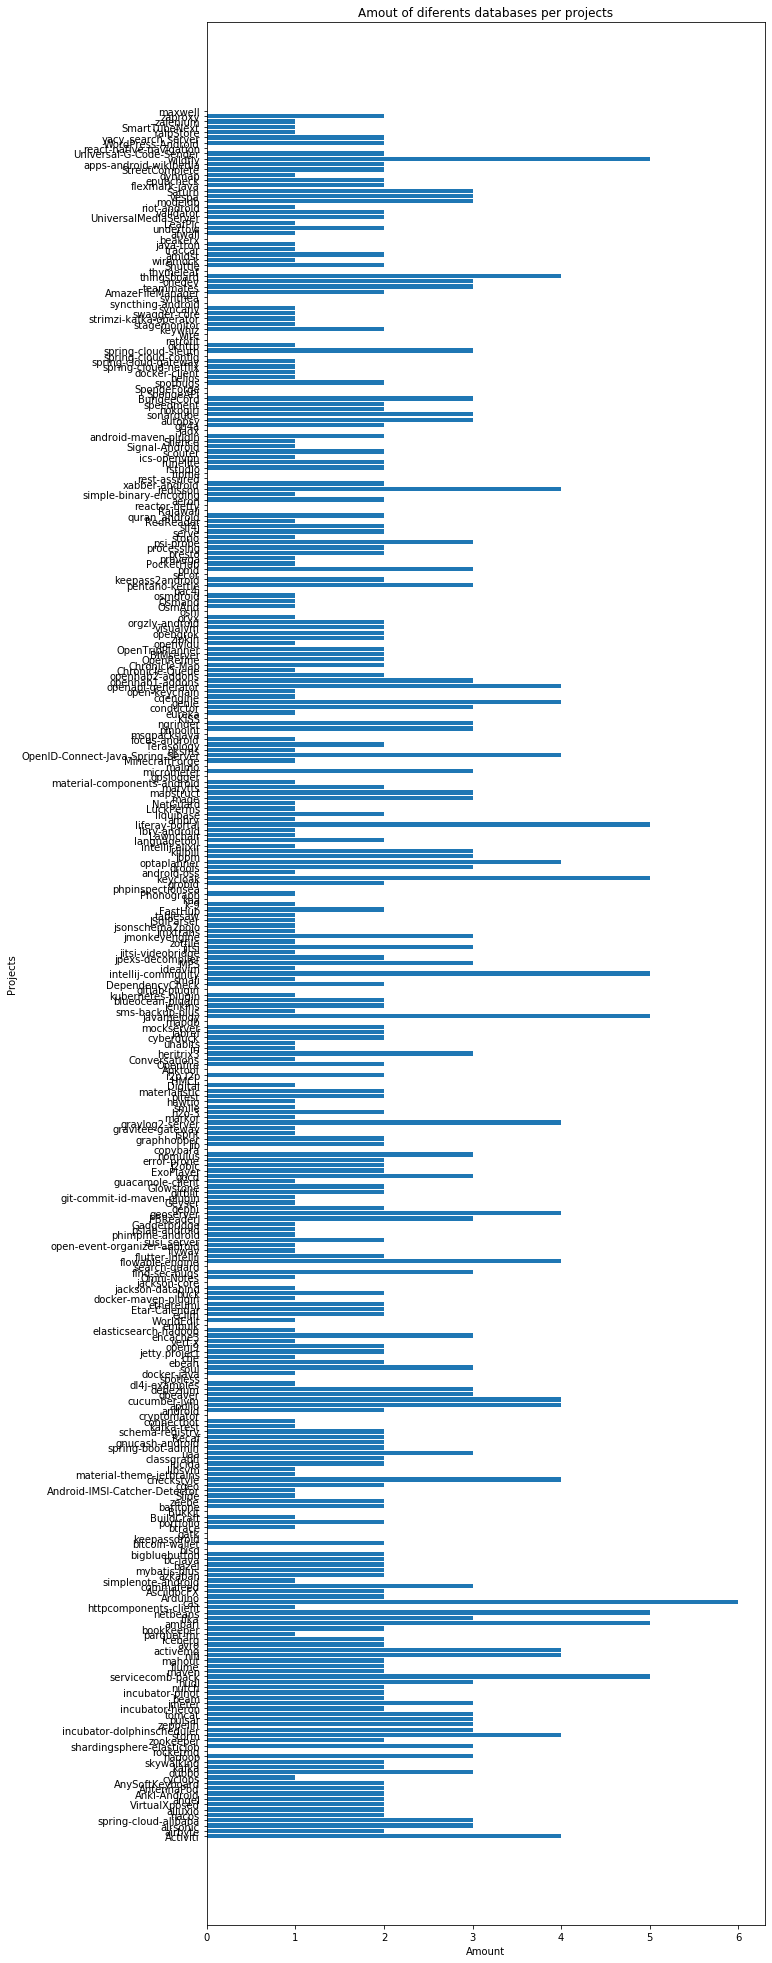

In [22]:
plt.figure(figsize=(10,35))
plt.barh(df.Projects, df.SumPerProject)
plt.title("Amout of diferents databases per projects")
plt.xlabel("Amount")
plt.ylabel("Projects")
plt.show()